In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [4]:
county_MSPPS = pd.read_csv('County_MedianSoldPricePerSqft_AllHomes.csv')

In [5]:
county_MSPPS.head()

,RegionID,RegionName,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,...,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10
0,3101,Los Angeles,CA,"Los Angeles-Long Beach-Anaheim, CA",6,37,1,114.7799,115.1006,115.6839,115.5553,115.4371,115.7096,115.1553,114.4947,113.5591,113.4599,112.8309,114.0809,116.1450,117.4541,117.7715,118.3850,118.6512,118.3335,118.7026,119.1490,120.2532,121.0734,121.2188,123.3063,125.1297,126.6563,127.6559,129.2299,129.2493,129.1125,129.1147,129.2371,129.3620,129.0285,127.6571,129.2792,131.5445,133.7728,136.4194,137.1990,136.4575,135.7960,135.7031,...,249.9950,245.2331,241.5565,243.4753,239.7611,239.6713,244.7504,249.5372,248.7824,251.5963,255.3310,257.3457,258.4074,258.1485,262.2464,263.6173,260.2395,262.4945,271.9379,283.9054,292.2481,301.8733,308.3356,309.7770,311.8562,310.7528,309.8247,312.6149,309.5992,309.9254,317.7629,322.5150,324.6530,326.8229,329.5564,330.2865,329.5447,331.2180,327.6181,325.3727,323.6776,327.8910,335.2020,342.4316,347.3260,349.9649,348.9673,352.4245,350.2916,350.4829
1,139,Cook,IL,Chicago,17,31,2,100.6451,103.2089,105.3554,106.2378,106.1976,104.6380,103.2061,102.5116,101.7448,99.6227,98.0652,100.9247,102.8574,104.5858,105.8886,107.4449,108.0175,108.8453,107.0423,104.9668,103.3332,101.9408,101.0656,103.1905,105.9165,108.4384,110.3544,111.7840,113.1460,113.0836,111.4665,111.1053,111.5665,112.1603,110.4252,109.7427,110.6966,112.4791,115.6355,116.9502,118.2457,118.2128,117.1529,...,156.8545,151.8135,144.8394,138.6695,139.1054,132.5436,133.0401,140.1857,145.8799,155.9447,158.7298,159.2491,157.0985,148.1374,144.4399,142.9168,142.7183,137.5354,135.7790,143.7904,154.3182,162.6028,171.1219,172.9647,169.1602,167.9888,162.5779,159.6867,159.1457,159.7985,157.4192,163.0274,172.0362,180.4317,178.4129,177.0642,178.1745,175.6481,169.6181,168.5484,163.4397,156.4066,159.2488,169.1933,178.0337,183.1322,186.1739,186.3046,185.3243,177.0312
2,2402,Maricopa,AZ,Phoenix,4,13,3,66.3109,66.0015,66.2639,66.4629,66.9694,67.5370,67.7399,68.1794,68.3600,68.7115,68.6524,68.8620,69.1980,69.7295,69.8902,69.8909,70.0975,70.6726,71.3885,71.5014,71.8241,72.1754,72.4879,72.7958,73.1703,73.6218,74.1482,74.2537,74.4274,74.8044,75.3214,75.8124,75.9853,76.3370,76.4836,76.7781,77.3339,77.9134,78.6298,78.5588,78.9541,79.5496,80.0052,...,85.9104,85.9507,86.2721,85.3835,86.7678,87.5243,89.6147,92.7884,96.3302,98.7117,99.2733,97.7057,98.5642,99.6785,100.2568,100.7032,102.0561,103.1838,105.8190,108.7013,111.2554,113.4139,114.8749,115.1904,114.8953,115.2192,115.6995,116.6939,116.6769,117.2122,118.5615,118.8414,119.2239,119.4415,119.1019,119.0562,119.0023,118.4771,118.4306,119.8135,120.7497,121.6305,122.2906,123.0504,124.8521,125.6607,125.5945,126.0793,126.7914,127.3459
3,2841,San Diego,CA,San Diego,6,73,4,105.0465,105.0423,105.1550,104.5961,104.4759,104.7738,105.3144,104.1801,106.6942,105.8833,105.1126,105.5891,105.9538,106.8722,106.7829,110.0181,110.1584,109.5730,109.6534,109.8784,110.5993,111.8121,112.5313,113.6182,115.1029,116.5147,117.7225,119.4214,120.5782,120.6634,120.1625,120.7897,121.0824,122.9625,123.3233,124.7483,126.0494,127.3016,128.7702,130.2595,131.6607,132.3887,132.5042,...,213.8675,209.7876,207.7423,206.3817,208.3076,206.9657,207.9690,212.4485,218.5225,218.9105,221.5456,221.7929,223.4803,224.1945,227.8059,231.0510,230.7813,235

In [10]:
county_MSPPS.shape

(1552, 242)

In [11]:
zip_MSPPS = pd.read_csv('Zip_MedianSoldPricePerSqft_AllHomes.csv')

In [12]:
zip_MSPPS.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,...,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10
0,62080,11368,New York,NY,New York,Queens,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,84630,60629,Chicago,IL,Chicago,Cook,2,83.3729,81.9039,86.2227,88.2281,92.4941,88.4356,84.2880,86.4587,87.2849,82.1885,84.3404,85.3516,83.9546,80.3261,80.8496,85.4139,87.8756,86.3272,86.9252,88.9441,84.8332,82.1182,82.8501,85.9554,85.4117,85.6305,90.6093,92.3588,95.8791,95.4600,97.4595,94.5612,91.3699,91.5263,90.7089,94.4271,92.9856,93.5025,95.1732,98.5480,97.9914,100.6991,101.1288,...,109.0509,100.4555,97.2719,95.8577,101.9246,106.3171,109.1850,115.7075,120.9565,124.7645,123.4396,118.7330,122.6573,106.9069,103.3210,102.9773,101.968100,108.3858,102.5008,111.5418,110.0932,103.3630,94.8442,99.4525,103.1513,123.4814,119.6632,125.0165,118.4917,112.127800,121.5239,120.1162,115.2933,103.542500,105.5923,121.6394,126.1742,125.6553,116.9917,113.1415,118.9884,107.6563,107.2762,109.5701,116.6246,111.9092,114.7804,127.931300,132.5965,131.3061
2,96193,90650,Norwalk,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles,3,117.3969,118.0225,113.3146,112.0347,114.1521,113.2268,111.2448,109.2356,112.6931,115.6738,115.9940,108.9467,113.3924,110.7738,108.5902,110.6241,113.3821,117.6624,114.2688,112.9188,114.2251,116.3165,111.2844,111.1042,112.2943,117.9401,117.9640,117.6704,117.3105,114.7438,115.1906,113.4917,119.0176,118.3696,119.5861,120.8136,122.6741,122.6501,123.3720,124.8398,125.4529,126.7413,127.6706,...,229.1417,235.6075,227.5498,219.8136,236.8887,234.3855,225.6425,229.9889,224.8353,227.7036,234.5118,234.7218,228.2131,221.8379,231.7794,230.8116,249.953400,258.6240,247.0731,248.9392,250.8335,266.6558,266.6535,268.9651,282.5015,287.1165,293.1764,281.2928,291.0114,282.929600,298.6052,289.6318,294.9153,300.241400,303.2769,291.9878,303.5781,314.2814,327.2802,317.2496,312.0753,297.1876,287.1131,305.2852,314.4935,339.6102,341.7029,339.365500,336.4867,343.4985
3,62037,11226,New York,NY,New York,Kings,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,439.330544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,62093,11385,New York,NY,New York,Queens,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,336.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,290.102389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,307.692308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,351.941748,NaN,NaN


In [14]:
zip_MSPPS.shape

(10669, 242)

In [15]:
neighborhood_MSPPS = pd.read_csv('Neighborhood_MedianSoldPricePerSqft_AllHomes.csv')

In [16]:
neighborhood_MSPPS.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,...,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10
0,274772,Northeast Dallas,Dallas,TX,Dallas-Fort Worth,Dallas,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.676421,56.4596,58.5240,58.3820,58.6807,58.9612,60.3452,59.6483,57.7037,57.3952,57.7746,58.0673,58.5399,59.2752,58.1359,59.1493,59.7725,60.4132,61.4853,61.5587,62.3125,62.4103,62.9696,64.0312,62.9424,62.7789,65.2966,66.7443,66.7008,67.5651,68.6849,70.3628,71.1921,70.7847,69.5913,...,102.7260,100.5517,102.9783,104.9113,96.0330,99.1475,109.4210,114.9108,120.4129,122.0205,125.1366,121.7369,122.5540,117.3037,117.0770,115.7104,111.6591,116.1645,122.5584,128.5107,132.5144,132.5777,132.5568,134.3479,134.7125,130.5281,132.6393,133.3924,123.2273,130.9949,139.2173,145.8460,147.9002,151.6379,152.1905,147.4124,145.3744,145.4997,148.2561,145.8983,140.9195,151.7308,159.8905,160.7415,167.1836,172.2717,171.5525,160.1018,158.5746,151.2914
1,192689,Paradise,Las Vegas,NV,Las Vegas,Clark,2,71.7410,71.7994,70.7296,69.9450,70.3616,71.1881,72.8309,NaN,NaN,NaN,NaN,76.0995,76.5485,75.3225,75.4786,75.9117,76.4239,75.8002,75.1670,73.0996,73.0561,75.2605,75.7415,76.4303,76.3297,76.1428,76.4309,76.2568,76.7188,75.6109,75.9800,76.7809,75.9604,76.6007,76.8663,78.1052,78.6371,79.2354,79.1136,79.5854,78.8240,77.8843,77.6461,...,70.0676,69.4229,66.6299,68.0948,65.7351,67.4423,68.8997,68.7142,69.0680,70.4373,71.4149,69.0665,70.9059,72.0290,74.3594,74.7713,76.4204,75.4293,77.9258,80.7360,83.0331,87.2296,91.1236,91.9168,92.1676,92.1024,96.3491,97.2803,96.0872,96.3614,98.7181,100.2858,100.8160,102.9287,101.7594,101.1342,104.8923,106.7035,108.2334,106.3621,104.6637,104.8817,108.2295,110.9771,111.1294,110.5070,110.2075,113.9084,119.4755,119.0092
2,112345,Maryvale,Phoenix,AZ,Phoenix,Maricopa,3,46.6023,47.1911,47.1452,47.9351,48.1220,49.5532,48.7765,49.9842,50.557800,50.4964,50.6326,50.7738,50.7631,51.1562,51.6241,50.9166,50.8068,51.3383,51.4251,51.2136,51.0479,50.9923,51.4836,51.6300,51.4663,52.0311,52.0268,52.4878,53.3010,54.2719,56.6643,56.6032,56.9416,57.4030,58.3064,58.2139,58.1348,59.1333,60.5886,61.5111,61.1811,60.7881,60.5504,...,38.0776,39.1084,38.8315,39.9486,40.5509,41.8711,42.8203,43.5789,44.3139,45.8311,46.3730,47.0134,50.2768,53.8153,54.0135,53.5970,53.8568,54.2482,57.0252,60.5468,61.2389,64.8635,66.2133,77.2120,75.9608,73.5874,71.1387,71.7949,75.3833,73.6689,74.4460,76.2922,76.9377,76.0260,75.0875,76.9750,78.6214,80.8856,77.8006,80.8132,79.2555,79.6935,81.6709,82.7293,85.3731,87.3996,87.8273,88.4877,90.1379,91.6189
3,270958,Upper West Side,New York,NY,New York,New York,4,267.2269,284.3680,282.8276,281.5681,269.4598,276.0266,273.0715,285.4880,295.607400,298.1623,275.6475,265.9262,277.9487,283.3657,317.1592,324.2214,325.4825,343.2920,339.0876,321.2672,333.8028,340.6400,362.8574,356.2644,356.0683,349.4055,360.0984,370.8395,391.2291,384.2952,395.2350,390.4751,382.9151,392.5478,415.8704,424.0337,414.9587,416.7380,424.6174,442.8229,448.1470,480.8566,482.1624,...,1132.2161,1192.8360,1173.9876,1090.0438,1023.9032,990.0747,1016.8034,1047.4334,1066.7507,1082.9048,1083.6396,1056.7352,1139.2951,1119.8421,1152.7695,1141.9177,1143.7798,1153.7034,1192.0230,1231.5860,1184.7827,1207.9570,1213.1828,1233.2892,1279.0915,1287.7256,1281.9801,1341.5449,1355.9673,1335.1089,1380.5316,1368.821

In [17]:
neighborhood_MSPPS.shape

(4148, 242)

In [25]:
np.array(neighborhood_MSPPS['1999-04'].values)

array([ 66.7008,  78.6371,  58.1348, ...,      nan,      nan,      nan])

In [64]:
zip_MSPPS_notNAN = zip_MSPPS.dropna(subset = ['2000-01','2000-02','2000-03','2010-01','2010-02','2010-03'])

In [65]:
zip_MSPPS_notNAN.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,...,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10
1,84630,60629,Chicago,IL,Chicago,Cook,2,83.3729,81.9039,86.2227,88.2281,92.4941,88.4356,84.2880,86.4587,87.2849,82.1885,84.3404,85.3516,83.9546,80.3261,80.8496,85.4139,87.8756,86.3272,86.9252,88.9441,84.8332,82.1182,82.8501,85.9554,85.4117,85.6305,90.6093,92.3588,95.8791,95.4600,97.4595,94.5612,91.3699,91.5263,90.7089,94.4271,92.9856,93.5025,95.1732,98.5480,97.9914,100.6991,101.1288,...,109.0509,100.4555,97.2719,95.8577,101.924600,106.3171,109.1850,115.7075,120.956500,124.7645,123.4396,118.7330,122.6573,106.9069,103.3210,102.9773,101.9681,108.3858,102.5008,111.5418,110.0932,103.3630,94.8442,99.4525,103.1513,123.4814,119.6632,125.0165,118.4917,112.1278,121.5239,120.1162,115.293300,103.5425,105.5923,121.6394,126.17420,125.6553,116.9917,113.141500,118.9884,107.6563,107.276200,109.5701,116.6246,111.9092,114.7804,127.9313,132.5965,131.306100
2,96193,90650,Norwalk,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles,3,117.3969,118.0225,113.3146,112.0347,114.1521,113.2268,111.2448,109.2356,112.6931,115.6738,115.9940,108.9467,113.3924,110.7738,108.5902,110.6241,113.3821,117.6624,114.2688,112.9188,114.2251,116.3165,111.2844,111.1042,112.2943,117.9401,117.9640,117.6704,117.3105,114.7438,115.1906,113.4917,119.0176,118.3696,119.5861,120.8136,122.6741,122.6501,123.3720,124.8398,125.4529,126.7413,127.6706,...,229.1417,235.6075,227.5498,219.8136,236.888700,234.3855,225.6425,229.9889,224.835300,227.7036,234.5118,234.7218,228.2131,221.8379,231.7794,230.8116,249.9534,258.6240,247.0731,248.9392,250.8335,266.6558,266.6535,268.9651,282.5015,287.1165,293.1764,281.2928,291.0114,282.9296,298.6052,289.6318,294.915300,300.2414,303.2769,291.9878,303.57810,314.2814,327.2802,317.249600,312.0753,297.1876,287.113100,305.2852,314.4935,339.6102,341.7029,339.3655,336.4867,343.498500
7,96125,90280,South Gate,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles,8,118.3015,121.3851,117.8144,122.3694,124.6468,122.9418,119.5063,118.1009,122.6550,121.1318,118.7361,112.8810,115.2853,114.9234,116.5601,115.7037,115.4531,117.2410,123.1254,117.5763,116.3737,117.3234,112.4569,116.4104,120.8716,121.4901,117.2832,119.2311,118.1527,123.1749,115.0169,114.8405,117.6092,119.9959,121.5556,118.0527,118.2184,119.1929,122.5280,119.8428,115.2839,117.3491,119.3010,...,219.8251,210.9062,210.6354,NaN,214.758811,202.8838,NaN,NaN,191.730827,NaN,202.3067,213.5910,NaN,201.5256,NaN,228.0380,NaN,209.3866,207.7554,222.7143,214.7797,245.8332,237.6460,215.1479,236.1431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,296.610169,NaN,NaN,NaN,272.65861,NaN,NaN,242.248062,NaN,NaN,266.089109,267.5440,281.4984,303.1221,312.5424,NaN,NaN,279.620853
9,62044,11234,New York,NY,New York,Kings,10,121.5520,118.0424,118.0727,126.0023,133.8862,133.6885,128.0814,125.2641,126.3982,129.4442,120.3073,117.9659,120.5530,122.6291,129.3141,129.9343,130.1099,125.6458,125.7005,131.3989,140.1974,137.7944,130.1397,132.0345,132.6331,136.1924,130.8164,133.0469,138.3822,144.2678,135.2022,134.7201,127.8309,136.6853,134.7529,143.2678,141.9421,144.9952,142.5590,144.5097,156.4639,156.0851,152.9121,...,309.1023,328.3996,305.4037,321.7006,340.412700,312.0736,310.0337,288.8684,NaN,287.0625,308.3865,308.2806,298.4197,314.6047,327.8408,314.3791,319.9522,327.0676,343

In [66]:
zip_MSPPS_notNAN.shape

(2374, 242)

(array([  14.,   25.,   60.,  132.,  154.,  229.,  230.,  173.,  179.,
         144.,  111.,  111.,   82.,   76.,   76.,   59.,   38.,   38.,
          47.,   32.,   35.,   34.,   32.,   28.,   31.,   32.,   13.,
          10.,   12.,   11.,   14.,   11.,    6.,   12.,    6.,    7.,
           5.,    6.,    4.,    5.,    1.,    3.,    6.,    4.,    1.,
           2.,    2.,    2.,    6.,    4.,    0.,    1.,    2.,    1.,
           2.,    0.,    1.,    0.,    2.,    0.,    2.,    0.,    0.,
           0.,    0.,    1.,    0.,    2.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           1.,    0.,    0.,    0.,    0.,    0.,    2.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    1.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([   

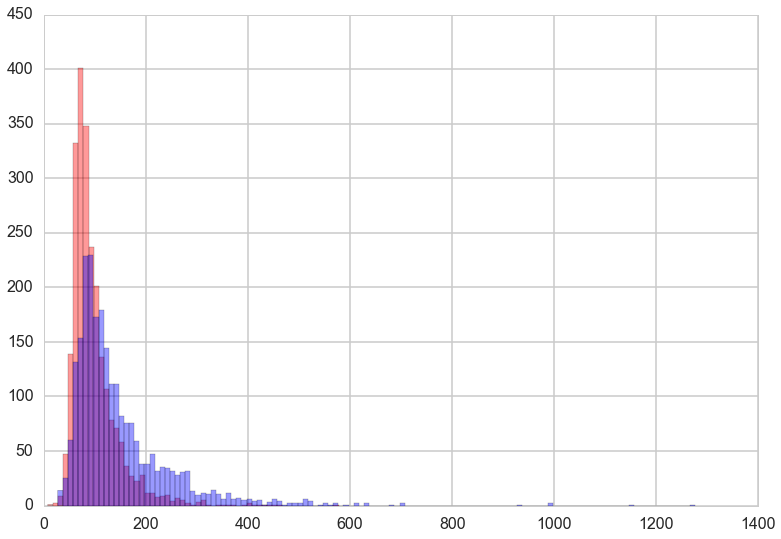

In [67]:
plt.hist(zip_MSPPS_notNAN['2000-01'].values, bins=np.arange(min(zip_MSPPS_notNAN['2000-01'].values), max(zip_MSPPS_notNAN['2000-01'].values) + 10, 10), color = 'r', alpha = 0.4)
plt.hist(zip_MSPPS_notNAN['2010-01'].values, bins=np.arange(min(zip_MSPPS_notNAN['2010-01'].values), max(zip_MSPPS_notNAN['2010-01'].values) + 10, 10), color = 'b', alpha = 0.4)

In [76]:
zip_MSPPS_notNAN['2000_agg'] = (zip_MSPPS_notNAN['2000-01'] + zip_MSPPS_notNAN['2000-02'] + zip_MSPPS_notNAN['2000-03'])/3
zip_MSPPS_notNAN['2010_agg'] = (zip_MSPPS_notNAN['2010-01'] + zip_MSPPS_notNAN['2010-02'] + zip_MSPPS_notNAN['2010-03'])/3
zip_MSPPS_notNAN['pct_delta'] = zip_MSPPS_notNAN['2010_agg']/zip_MSPPS_notNAN['2000_agg']

/Users/hes/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/hes/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
/Users/hes/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [77]:
zip_MSPPS_notNAN.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,...,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2000_agg,2010_agg,pct_delta
1,84630,60629,Chicago,IL,Chicago,Cook,2,83.3729,81.9039,86.2227,88.2281,92.4941,88.4356,84.2880,86.4587,87.2849,82.1885,84.3404,85.3516,83.9546,80.3261,80.8496,85.4139,87.8756,86.3272,86.9252,88.9441,84.8332,82.1182,82.8501,85.9554,85.4117,85.6305,90.6093,92.3588,95.8791,95.4600,97.4595,94.5612,91.3699,91.5263,90.7089,94.4271,92.9856,93.5025,95.1732,98.5480,97.9914,100.6991,101.1288,...,95.8577,101.924600,106.3171,109.1850,115.7075,120.956500,124.7645,123.4396,118.7330,122.6573,106.9069,103.3210,102.9773,101.9681,108.3858,102.5008,111.5418,110.0932,103.3630,94.8442,99.4525,103.1513,123.4814,119.6632,125.0165,118.4917,112.1278,121.5239,120.1162,115.293300,103.5425,105.5923,121.6394,126.17420,125.6553,116.9917,113.141500,118.9884,107.6563,107.276200,109.5701,116.6246,111.9092,114.7804,127.9313,132.5965,131.306100,96.816267,118.058167,1.219404
2,96193,90650,Norwalk,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles,3,117.3969,118.0225,113.3146,112.0347,114.1521,113.2268,111.2448,109.2356,112.6931,115.6738,115.9940,108.9467,113.3924,110.7738,108.5902,110.6241,113.3821,117.6624,114.2688,112.9188,114.2251,116.3165,111.2844,111.1042,112.2943,117.9401,117.9640,117.6704,117.3105,114.7438,115.1906,113.4917,119.0176,118.3696,119.5861,120.8136,122.6741,122.6501,123.3720,124.8398,125.4529,126.7413,127.6706,...,219.8136,236.888700,234.3855,225.6425,229.9889,224.835300,227.7036,234.5118,234.7218,228.2131,221.8379,231.7794,230.8116,249.9534,258.6240,247.0731,248.9392,250.8335,266.6558,266.6535,268.9651,282.5015,287.1165,293.1764,281.2928,291.0114,282.9296,298.6052,289.6318,294.915300,300.2414,303.2769,291.9878,303.57810,314.2814,327.2802,317.249600,312.0753,297.1876,287.113100,305.2852,314.4935,339.6102,341.7029,339.3655,336.4867,343.498500,129.228367,239.039133,1.849742
7,96125,90280,South Gate,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles,8,118.3015,121.3851,117.8144,122.3694,124.6468,122.9418,119.5063,118.1009,122.6550,121.1318,118.7361,112.8810,115.2853,114.9234,116.5601,115.7037,115.4531,117.2410,123.1254,117.5763,116.3737,117.3234,112.4569,116.4104,120.8716,121.4901,117.2832,119.2311,118.1527,123.1749,115.0169,114.8405,117.6092,119.9959,121.5556,118.0527,118.2184,119.1929,122.5280,119.8428,115.2839,117.3491,119.3010,...,NaN,214.758811,202.8838,NaN,NaN,191.730827,NaN,202.3067,213.5910,NaN,201.5256,NaN,228.0380,NaN,209.3866,207.7554,222.7143,214.7797,245.8332,237.6460,215.1479,236.1431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,296.610169,NaN,NaN,NaN,272.65861,NaN,NaN,242.248062,NaN,NaN,266.089109,267.5440,281.4984,303.1221,312.5424,NaN,NaN,279.620853,129.433100,203.270333,1.570466
9,62044,11234,New York,NY,New York,Kings,10,121.5520,118.0424,118.0727,126.0023,133.8862,133.6885,128.0814,125.2641,126.3982,129.4442,120.3073,117.9659,120.5530,122.6291,129.3141,129.9343,130.1099,125.6458,125.7005,131.3989,140.1974,137.7944,130.1397,132.0345,132.6331,136.1924,130.8164,133.0469,138.3822,144.2678,135.2022,134.7201,127.8309,136.6853,134.7529,143.2678,141.9421,144.9952,142.5590,144.5097,156.4639,156.0851,152.9121,...,321.7006,340.412700,312.0736,310.0337,288.8684,NaN,287.0625,308.3865,308.2806,298.4197,314.6047,327.8408,314.3791,319.9522,327.0676,343.8721,318.1

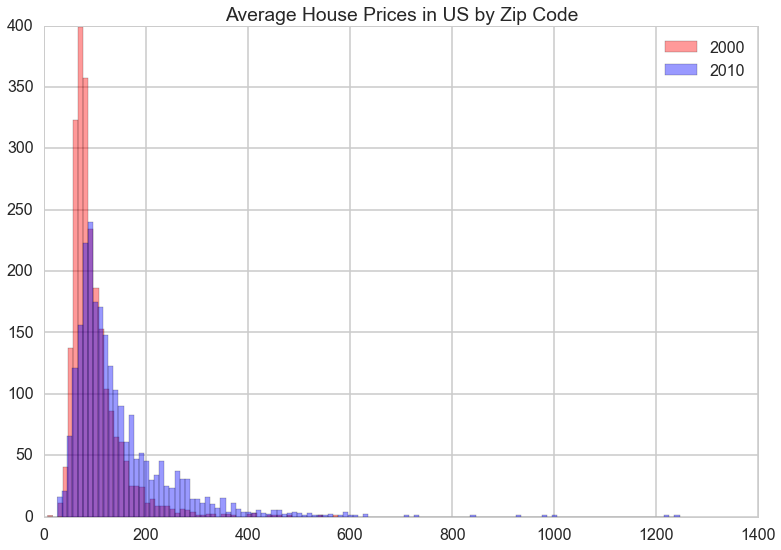

In [75]:
plt.hist(zip_MSPPS_notNAN['2000_agg'].values, bins=np.arange(min(zip_MSPPS_notNAN['2000_agg'].values), max(zip_MSPPS_notNAN['2000_agg'].values) + 10, 10), color = 'r', alpha = 0.4, label = '2000')
plt.hist(zip_MSPPS_notNAN['2010_agg'].values, bins=np.arange(min(zip_MSPPS_notNAN['2010_agg'].values), max(zip_MSPPS_notNAN['2010_agg'].values) + 10, 10), color = 'b', alpha = 0.4, label = '2010')
plt.legend()
plt.title('Average House Prices in US by Zip Code')

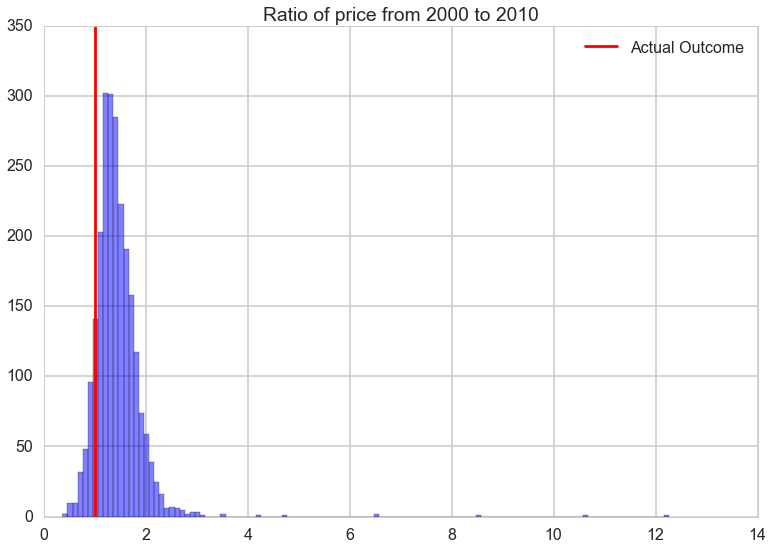

In [89]:
plt.hist(zip_MSPPS_notNAN['pct_delta'].values, bins=np.arange(min(zip_MSPPS_notNAN['pct_delta'].values), max(zip_MSPPS_notNAN['pct_delta'].values) + .1, .1), color = 'b', alpha = 0.5)
plt.axvline(1, 0, 1, color='r', label='Actual Outcome')
plt.legend()
plt.title('Ratio of price from 2000 to 2010 ')

In [98]:
print np.mean(zip_MSPPS_notNAN['pct_delta'].values)
print np.median(zip_MSPPS_notNAN['pct_delta'].values)
print np.var(zip_MSPPS_notNAN['pct_delta'].values)

1.43701999243
1.38236013921
0.269694418135
